In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [19]:
df = pd.read_excel("Junior Data Analyst _ Data.xlsx", skiprows=2)
df = df.set_index("Date/hour start")
df.index = pd.to_datetime(df.index)

In [20]:
df.shape

(8760, 3)

In [4]:
df.describe()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760.000000,8760.00000
mean,11.500000,1.116750,2.06424
std,6.922582,2.026098,4.64691
min,0.000000,0.000000,-12.62400
25%,5.750000,0.000000,0.30000
50%,11.500000,0.024000,0.62100
75%,17.250000,1.272750,1.68600
max,23.000000,13.050000,61.10280


In [5]:
df.head()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
Date/hour start,,,
2020-01-01 00:00:00,0,0.0,1.509849
2020-01-01 01:00:00,1,0.0,1.411859
2020-01-01 02:00:00,2,0.0,1.023898
2020-01-01 03:00:00,3,0.0,0.642000
2020-01-01 04:00:00,4,0.0,0.960000


In [6]:
df.tail()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
Date/hour start,,,
2020-12-31 19:00:00,19,0.012,4.395600
2020-12-31 20:00:00,20,0.003,4.560600
2020-12-31 21:00:00,21,0.000,2.022000
2020-12-31 22:00:00,22,0.015,1.668000
2020-12-31 23:00:00,23,0.000,0.805919


In [7]:
df.columns

Index(['Hour', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')

In [8]:
df.isnull().sum()

Hour                                  0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

In [9]:
df.isnull().sum().sort_values()

Hour                                  0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

In [10]:
df.head()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
Date/hour start,,,
2020-01-01 00:00:00,0,0.0,1.509849
2020-01-01 01:00:00,1,0.0,1.411859
2020-01-01 02:00:00,2,0.0,1.023898
2020-01-01 03:00:00,3,0.0,0.642000
2020-01-01 04:00:00,4,0.0,0.960000


In [11]:
#Build a model using regression analysis  to investigate model relationship between dependent variable and independent variables
#Dependent variable = Date/hour start, independent variable = Solar Electricity generation (kWw), Electicity Usage(Kwh)

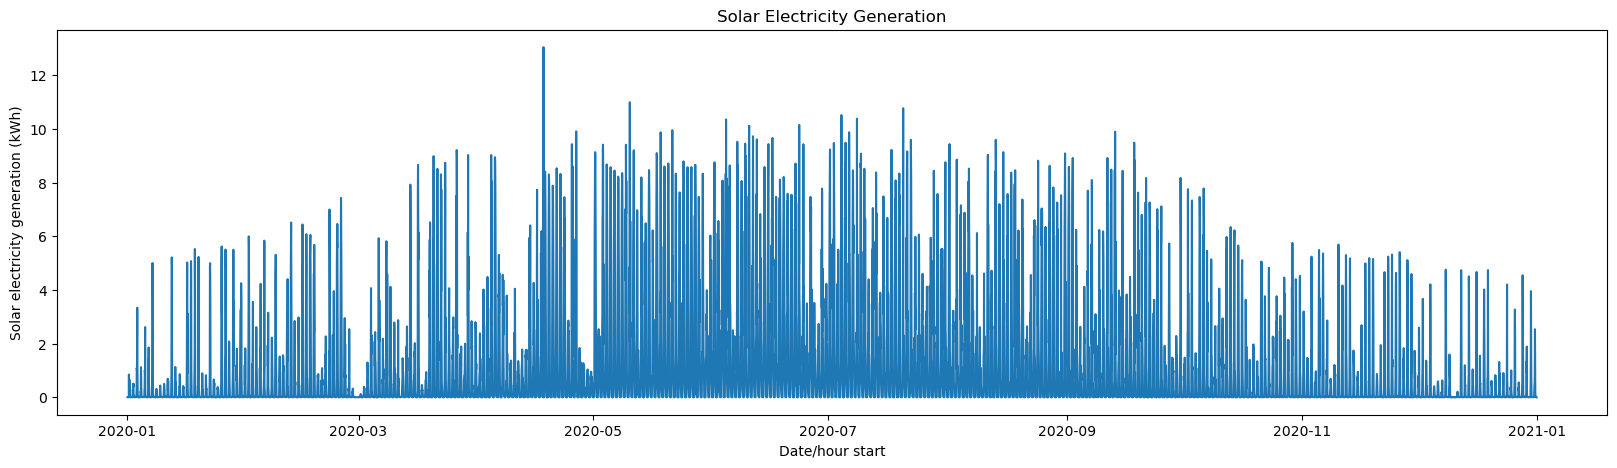

In [12]:
#Data Visualization
plt.figure(figsize=(20,5))
plt.plot(df.index, df['Solar electricity generation (kWh)'])
plt.title("Solar Electricity Generation")
plt.xlabel("Date/hour start")
plt.ylabel('Solar electricity generation (kWh)')
plt.show()

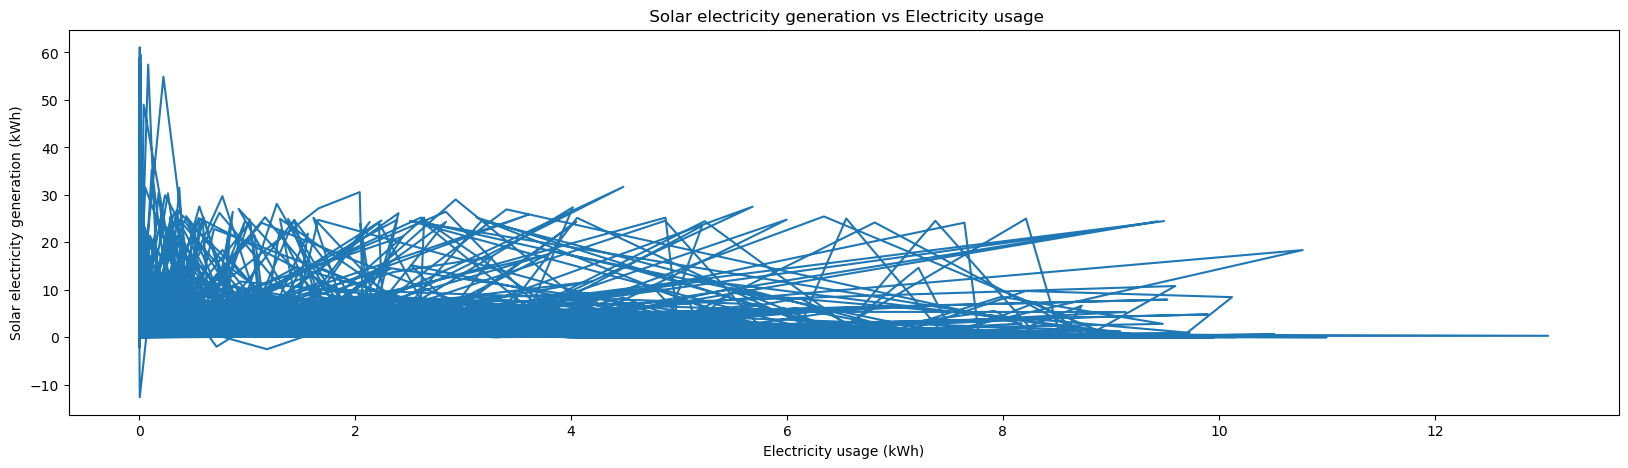

In [13]:
plt.figure(figsize=(20,5))
plt.plot(df['Solar electricity generation (kWh)'], df['Electricity usage (kWh)'])
plt.title(" Solar electricity generation vs Electricity usage")
plt.xlabel("Electricity usage (kWh)")
plt.ylabel('Solar electricity generation (kWh)')
plt.show()

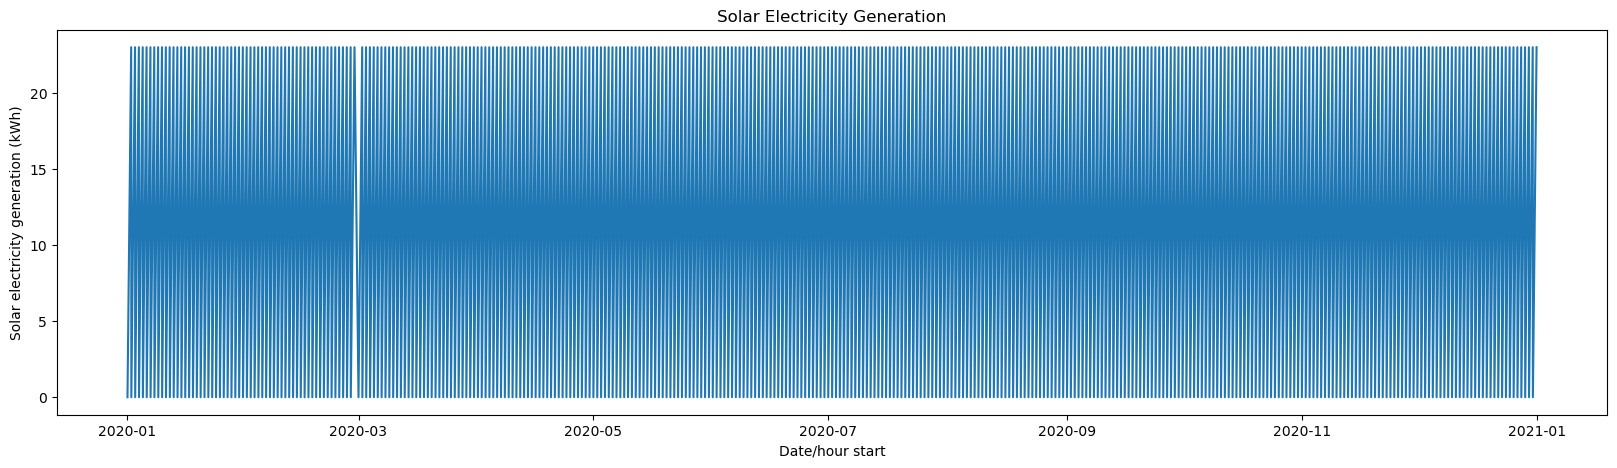

In [14]:
plt.figure(figsize=(20,5))
plt.plot(df.index, df['Hour'])
plt.title("Solar Electricity Generation")
plt.xlabel("Date/hour start")
plt.ylabel('Solar electricity generation (kWh)')
plt.show()

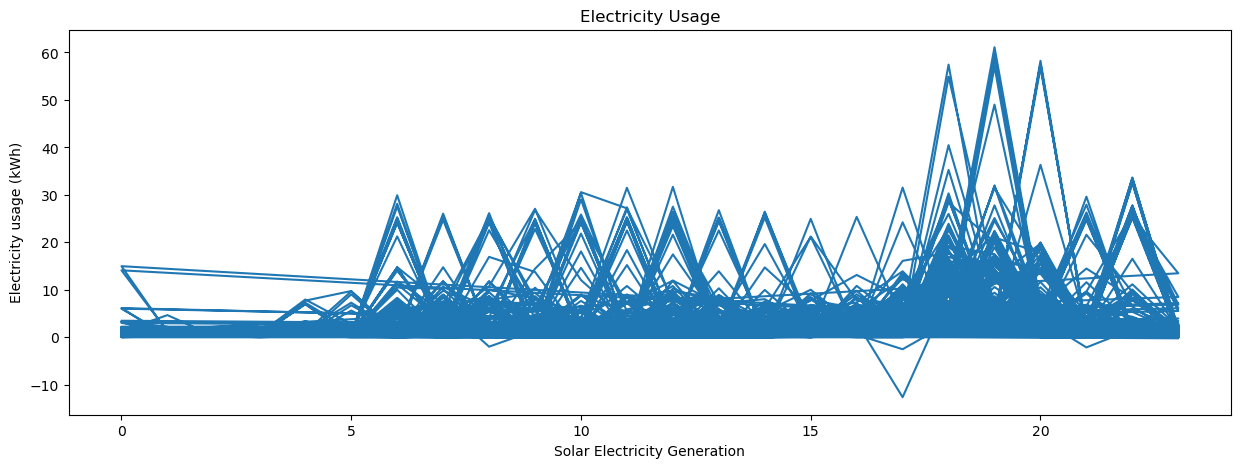

In [15]:
plt.figure(figsize=(15,5))
plt.plot(df['Hour'], df['Electricity usage (kWh)'])
plt.title("Electricity Usage")
plt.xlabel("Solar Electricity Generation")
plt.ylabel('Electricity usage (kWh)')
plt.show()

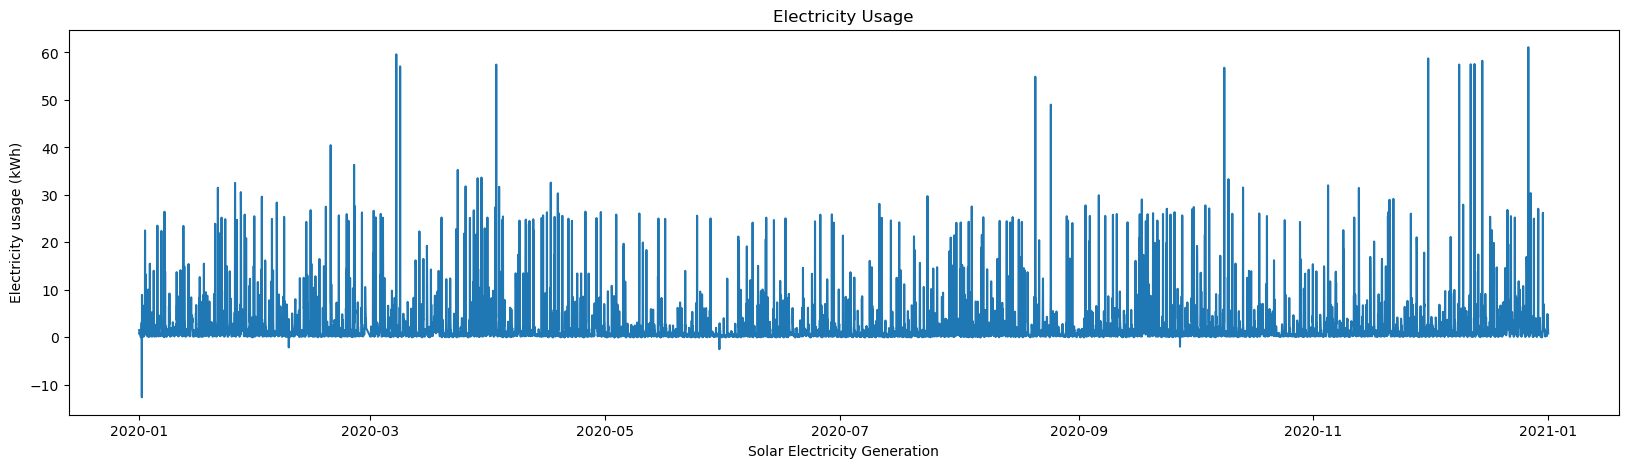

In [16]:
plt.figure(figsize=(20,5))
plt.plot(df.index, df['Electricity usage (kWh)'])
plt.title("Electricity Usage")
plt.xlabel("Solar Electricity Generation")
plt.ylabel('Electricity usage (kWh)')
plt.show()

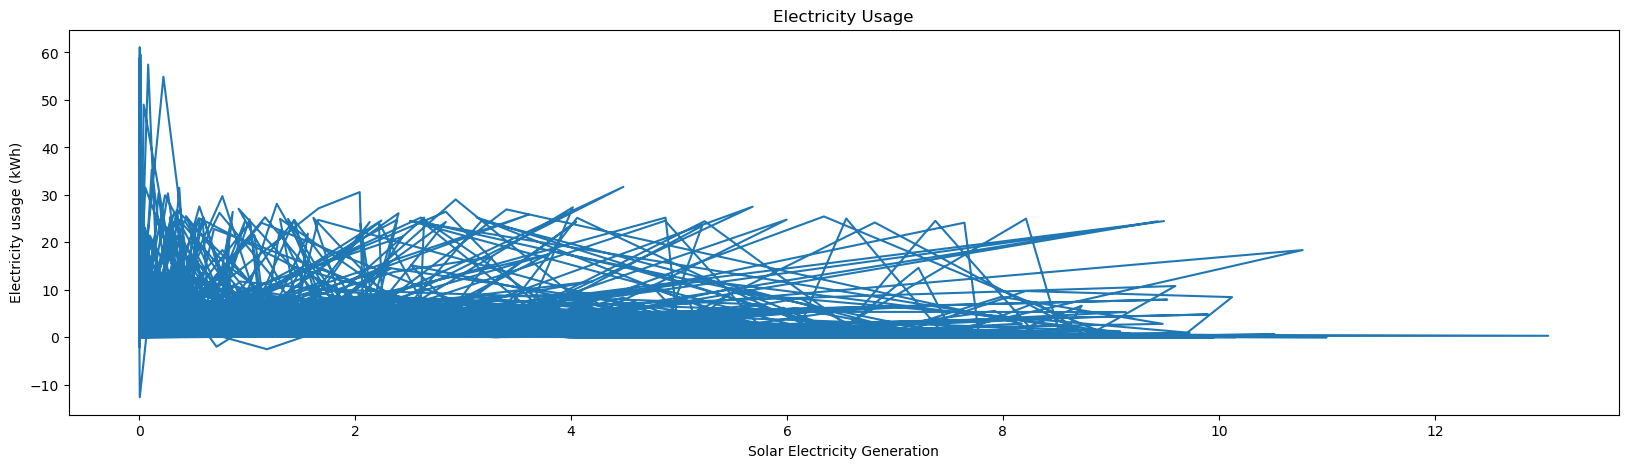

In [17]:
plt.figure(figsize=(20,5))
plt.plot(df['Solar electricity generation (kWh)'], df['Electricity usage (kWh)'])
plt.title("Electricity Usage")
plt.xlabel("Solar Electricity Generation")
plt.ylabel('Electricity usage (kWh)')
plt.show()

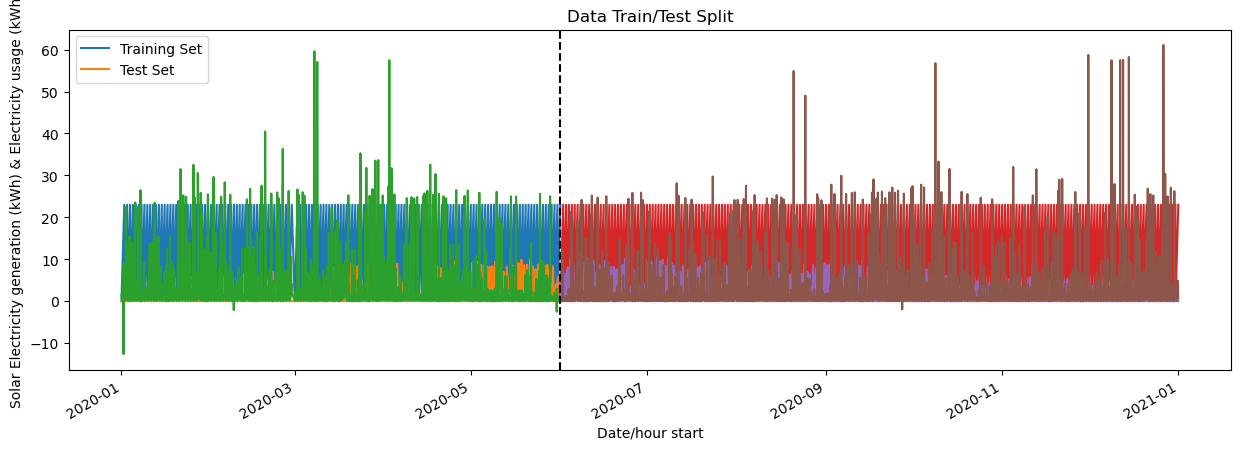

In [21]:
# Using Machine Learning to Forecast energy consumption
# Model building using Time Series Forecasting using Machine Learning and Python with XGBoost
# We are going to use it to predict future electronic consumption using given historic data
# Build Train / Test model
train = df.loc[df.index < '2020-06-01']
test = df.loc[df.index >= '2020-06-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title= 'Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2020-06-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.ylabel('Solar Electricity generation (kWh) & Electricity usage (kWh)')
plt.show()

<Figure size 2000x500 with 0 Axes>

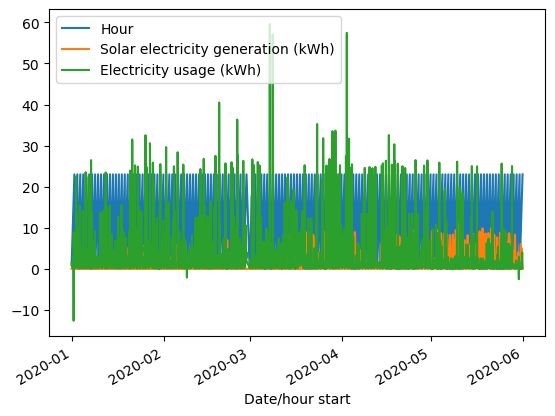

<Figure size 2000x500 with 0 Axes>

In [22]:
df.loc[(df.index > '2020-01-01') & (df.index < '2020-06-01')].plot()
plt.figure(figsize=(20,5))

<Figure size 2000x500 with 0 Axes>

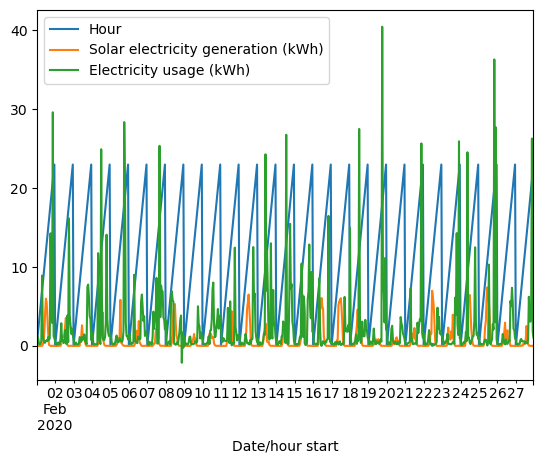

<Figure size 2000x500 with 0 Axes>

In [23]:
df.loc[(df.index > '2020-02-01') & (df.index < '2020-02-28')].plot()
plt.figure(figsize=(20,5))

<Figure size 2000x500 with 0 Axes>

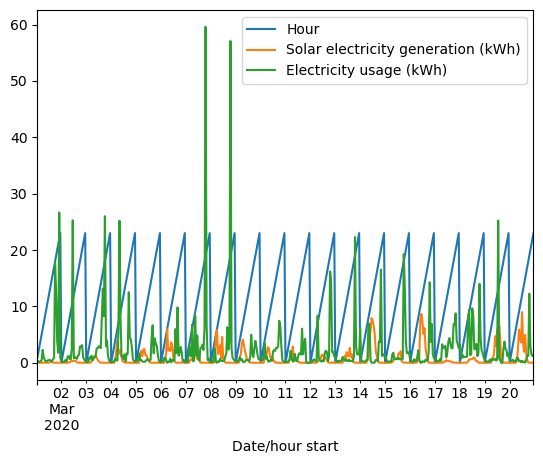

<Figure size 2000x500 with 0 Axes>

In [24]:
df.loc[(df.index > '2020-03-01') & (df.index < '2020-03-21')].plot()
plt.figure(figsize=(20,5))

<Figure size 2000x500 with 0 Axes>

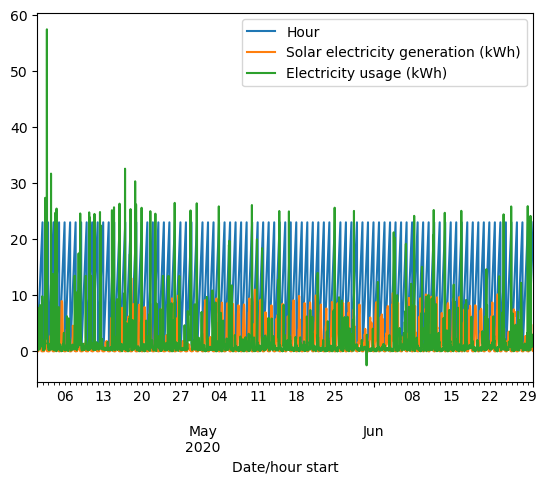

<Figure size 2000x500 with 0 Axes>

In [25]:
df.loc[(df.index > '2020-04-01') & (df.index < '2020-06-30')].plot()
plt.figure(figsize=(20,5))

<Figure size 2000x500 with 0 Axes>

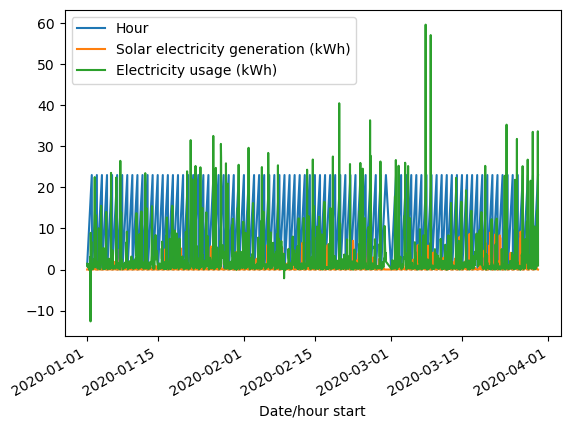

<Figure size 2000x500 with 0 Axes>

In [26]:
df.loc[(df.index > '2020-01-01') & (df.index < '2020-03-30')].plot()
plt.figure(figsize=(20,5))

In [28]:
#Feature creation
#Create featurees of this data using time series index
def create_features(df):
    """
    
    Create time series features based on time series index.
    """
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.day_of_week
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear

    return df

df = create_features(df)

In [29]:
df.head()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),hour,dayofweek,quarter,month,year,dayofyear
Date/hour start,,,,,,,,,
2020-01-01 00:00:00,0,0.0,1.509849,0,2,1,1,2020,1
2020-01-01 01:00:00,1,0.0,1.411859,1,2,1,1,2020,1
2020-01-01 02:00:00,2,0.0,1.023898,2,2,1,1,2020,1
2020-01-01 03:00:00,3,0.0,0.642000,3,2,1,1,2020,1
2020-01-01 04:00:00,4,0.0,0.960000,4,2,1,1,2020,1


Text(0.5, 1.0, 'Solar electricity generation (kWh)')

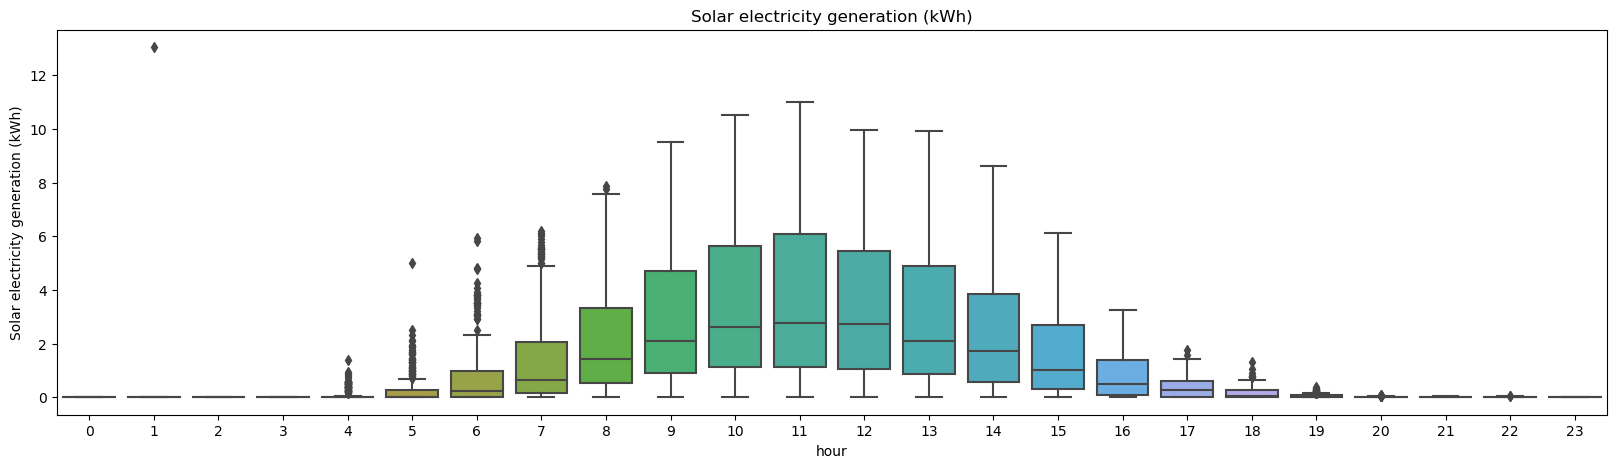

In [32]:
# Visualiza our feature / target relationship
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(data=df, x='hour', y= 'Solar electricity generation (kWh)')
ax.set_title('Solar electricity generation (kWh)')

Text(0.5, 1.0, 'Electricity usage (kWh)')

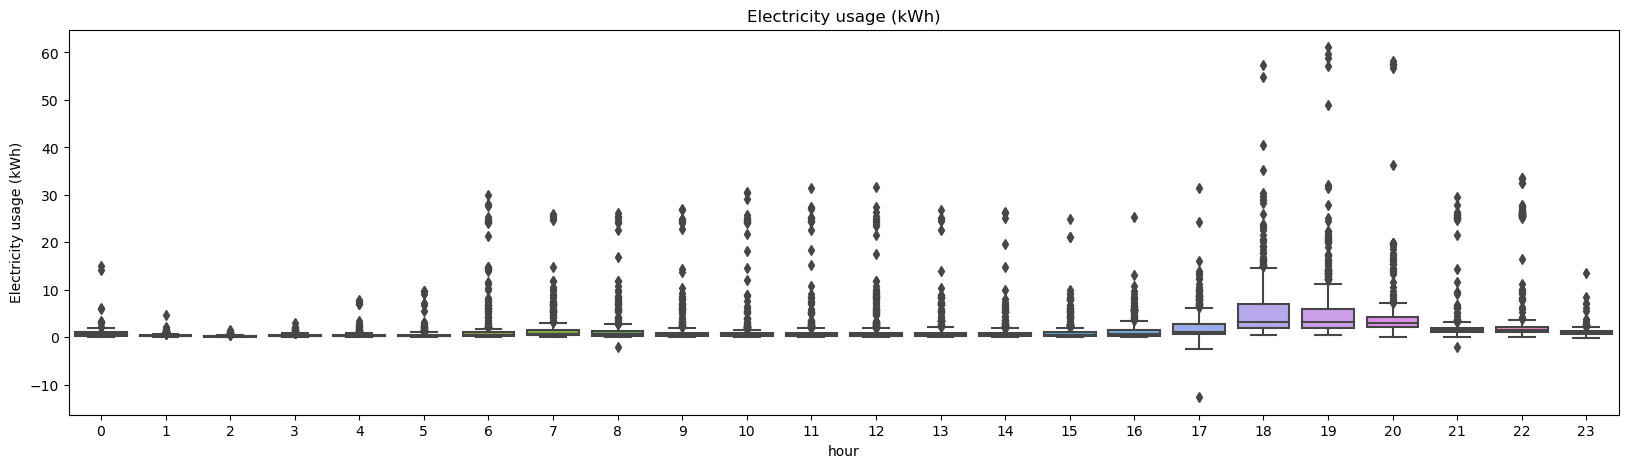

In [33]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(data=df, x='hour', y= 'Electricity usage (kWh)')
ax.set_title('Electricity usage (kWh)')

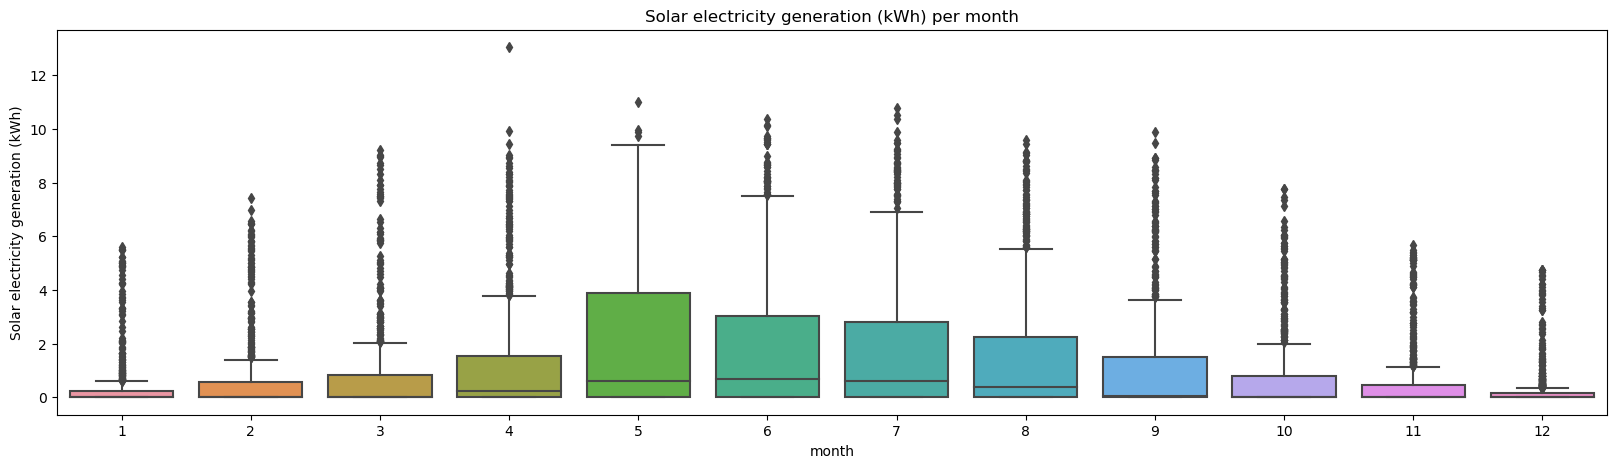

In [38]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(data=df, x='month', y='Solar electricity generation (kWh)')
ax.set_title('Solar electricity generation (kWh) per month')
plt.show()

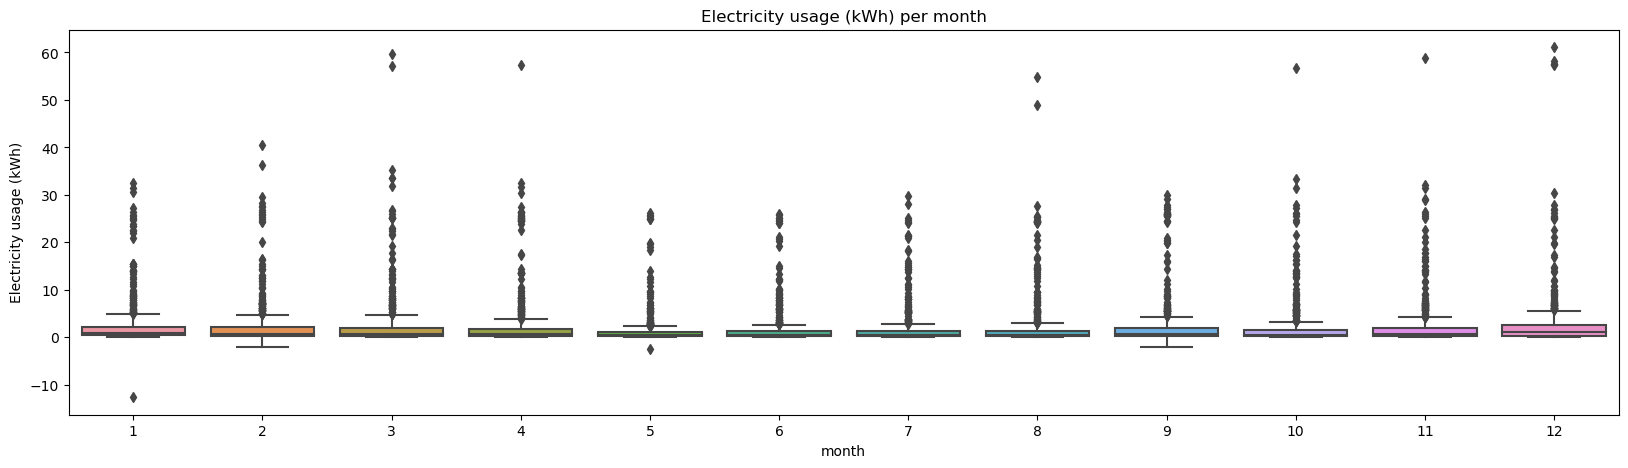

In [39]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(data=df, x='month', y='Electricity usage (kWh)')
ax.set_title('Electricity usage (kWh) per month')
plt.show()

In [46]:
# Create Model based on training data and evaluate it on the test data
# Use regression model using XGB Regressor
train = create_features(train)
test = create_features(test)

C:\Users\user\AppData\Local\Temp\ipykernel_17556\3445615287.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\user\AppData\Local\Temp\ipykernel_17556\3445615287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.day_of_week
C:\Users\user\AppData\Local\Temp\ipykernel_17556\3445615287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [48]:
df.columns

Index(['Hour', 'Solar electricity generation (kWh)', 'Electricity usage (kWh)',
       'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear'],
      dtype='object')

In [49]:
FEATURES = ['Hour', 'Solar electricity generation (kWh)', 'Electricity usage (kWh)','hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'Solar electricity generation (kWh)'

In [50]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [55]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                        learning_rate=0.001 )
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:2.03239	validation_1-rmse:2.01900
[100]	validation_0-rmse:1.84198	validation_1-rmse:1.83033
[200]	validation_0-rmse:1.66956	validation_1-rmse:1.65969
[300]	validation_0-rmse:1.51339	validation_1-rmse:1.50493
[400]	validation_0-rmse:1.37191	validation_1-rmse:1.36453
[500]	validation_0-rmse:1.24375	validation_1-rmse:1.23724
[600]	validation_0-rmse:1.12767	validation_1-rmse:1.12156
[700]	validation_0-rmse:1.02253	validation_1-rmse:1.01673
[800]	validation_0-rmse:0.92729	validation_1-rmse:0.92194
[900]	validation_0-rmse:0.84102	validation_1-rmse:0.83619
[999]	validation_0-rmse:0.76364	validation_1-rmse:0.75898


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
FEATURES = ['Hour', 'Solar electricity generation (kWh)', 'Electricity usage (kWh)','hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'Electricity usage (kWh)'

In [57]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [58]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                        learning_rate=0.001 )
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:4.67887	validation_1-rmse:4.61752
[100]	validation_0-rmse:4.25752	validation_1-rmse:4.22567
[200]	validation_0-rmse:3.87619	validation_1-rmse:3.87190
[300]	validation_0-rmse:3.53120	validation_1-rmse:3.55257
[400]	validation_0-rmse:3.21925	validation_1-rmse:3.26485
[500]	validation_0-rmse:2.93740	validation_1-rmse:3.00555
[600]	validation_0-rmse:2.68269	validation_1-rmse:2.77072
[700]	validation_0-rmse:2.45200	validation_1-rmse:2.57906
[800]	validation_0-rmse:2.24327	validation_1-rmse:2.41105
[900]	validation_0-rmse:2.05224	validation_1-rmse:2.25469
[999]	validation_0-rmse:1.88018	validation_1-rmse:2.11347


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [67]:
#Model is trained using XGBooost
#We check the Feature importance
eg = pd.DataFrame(data = reg.feature_importances_,
             index = reg.feature_names_in_,
             columns=['importance'])

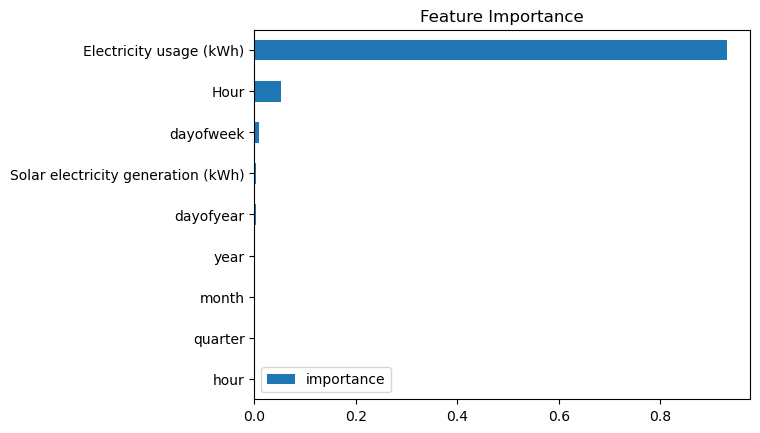

In [68]:
eg.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17556\915947752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


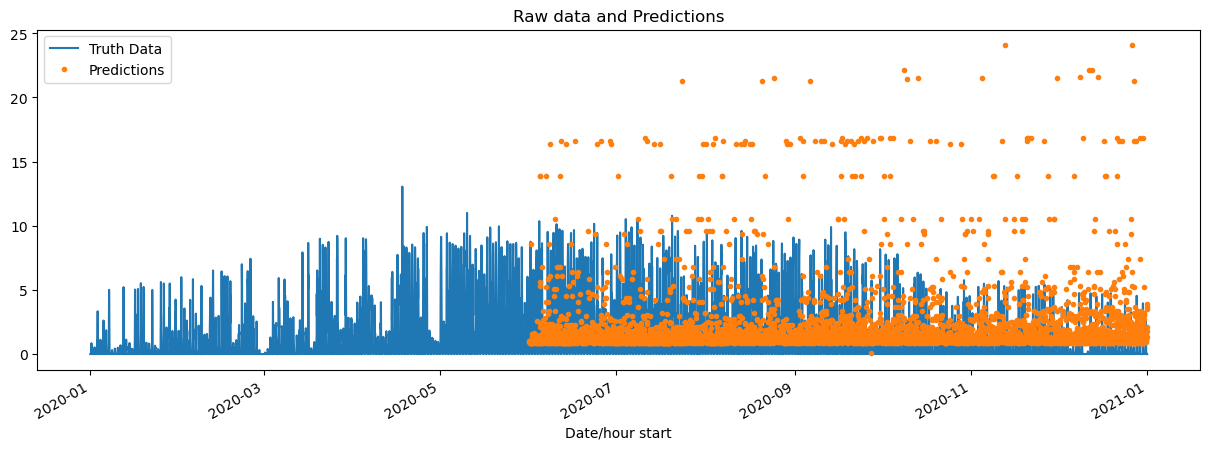

In [75]:
#Forecast on test set using our training model
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Solar electricity generation (kWh)']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', "Predictions"])
ax.set_title('Raw data and Predictions')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17556\2125230125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


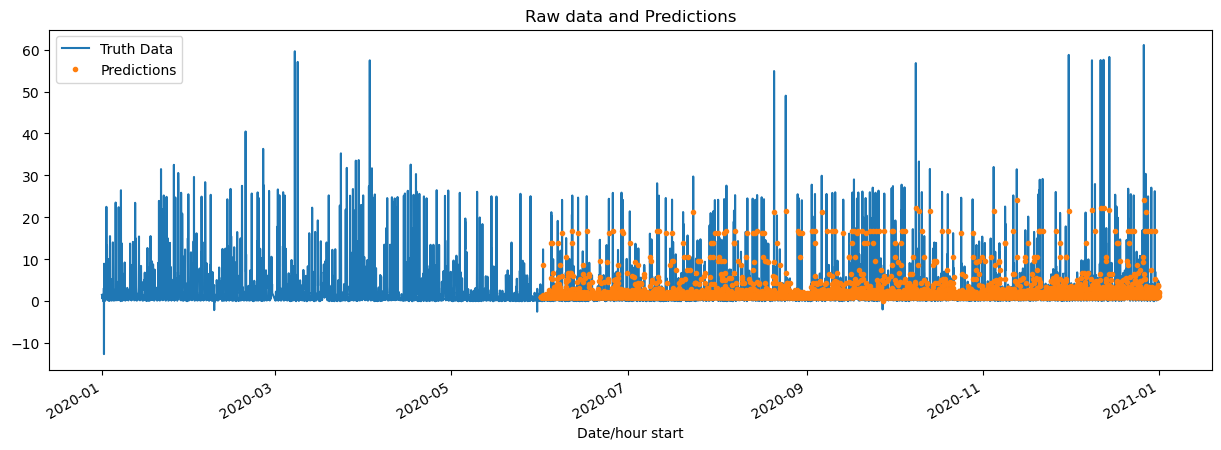

In [78]:
#Forecast on test set using our training model
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Electricity usage (kWh)']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', "Predictions"])
ax.set_title('Raw data and Predictions')
plt.show()

In [87]:
#Run evaluation metrics using test predictions
score = np.sqrt(mean_squared_error(test['Solar electricity generation (kWh)'], test['prediction']))
print(f'Solar electricity generation (kWh) Score on Test set: {score:0.2f}')

Solar electricity generation (kWh) Score on Test set: 3.54


In [90]:
score = np.sqrt(mean_squared_error(test['Electricity usage (kWh)'], test['prediction']))
print(f'Electricity usage (kWh) Score on Test set: {score:0.2f}')

Electricity usage (kWh) Score on Test set: 2.11


In [99]:
#Calculate Error
# Worst and best predicted days
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby('date')['error'].mean().sort_values(ascending=False).head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_17556\2370900365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test[TARGET] - test['prediction'])
C:\Users\user\AppData\Local\Temp\ipykernel_17556\2370900365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = test.index.date


date
2020-12-26    2.492077
2020-08-20    2.294184
2020-12-14    2.160859
2020-12-11    2.132551
2020-12-08    2.095251
Name: error, dtype: float64

In [100]:
test.groupby('date')['error'].mean().sort_values(ascending=True).head(5)

date
2020-12-02    0.485216
2020-12-01    0.487335
2020-09-01    0.502394
2020-06-22    0.503751
2020-06-18    0.507050
Name: error, dtype: float64

In [ ]:
#Next steps
#Create robust cross validation
#Add more robust features.

In [101]:
pwd

'C:\\Users\\user\\Downloads\\archive (4)\\Untitled Folder'